In [1]:
import dinkum
from dinkum.vfg import Gene, Receptor, Ligand
from dinkum.vfn import Tissue
from dinkum import vfg, vfn

from dinkum.display import MultiTissuePanel, tc_record_activity

import pandas as pd
from matplotlib import pyplot as plt


## Activation at a threshold

Here, A is maternally encoded and will decay over time. B is activated by A with a dealy of 1, as long as A's concentration is over 20.

initializing: dinkum v0.4.0.dev0
start=1 stop=5


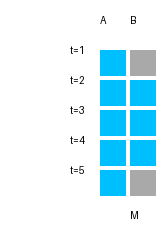

In [2]:
dinkum.reset()

def activation_at_threshold(A):
    if A.level > 20:
        return 50, True
    else:
        return 0, False

m = Tissue(name='M')
a = Gene(name='A')
b = Gene(name='B')

a.is_present(where=m, decay=2, start=1)
b.custom_activation2(state_fn=activation_at_threshold)

gene_names = vfg.get_gene_names()
display_fn, conc_df, active_df = dinkum.run_and_display_df(start=1, stop=5, gene_names=gene_names)
display_fn

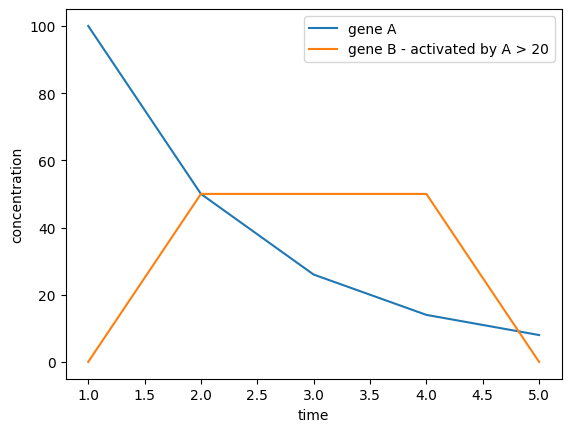

In [3]:
# now let's plot the concentrations
plt.plot(conc_df.timepoint, conc_df.A, label='gene A')
plt.plot(conc_df.timepoint, conc_df.B, label='gene B - activated by A > 20')
plt.xlabel('time')
plt.ylabel('concentration')
plt.legend()

In [4]:
# the concentration information is in a pandas dataframe
conc_df

,tissue,timepoint,timepoint_str,A,B
0,M,1,t=1,100,0
1,M,2,t=2,50,50
2,M,3,t=3,26,50
3,M,4,t=4,14,50
4,M,5,t=5,8,0


In [5]:
active_df

,tissue,timepoint,timepoint_str,A,B
0,M,1,t=1,True,False
1,M,2,t=2,True,True
2,M,3,t=3,True,True
3,M,4,t=4,True,True
4,M,5,t=5,True,False


## Now let's try out a custom repression threshold

A will be a (constant) activator, B will be a repressor that starts out high but decays, and C will be activated by A unless B is over 20.

initializing: dinkum v0.4.0.dev0
['A', 'B', 'C']
start=1 stop=5


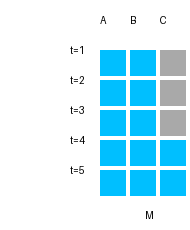

In [8]:
dinkum.reset()

def repress_above_threshold(A, B):
    if B.active and B.level > 20: # repressed!
        # repressed?
        return 0, False

    if A.level > 0 and A.active:
        return 100, True

    # by default, off.
    return 0, False

m = Tissue(name='M')
a = Gene(name='A')
b = Gene(name='B')
c = Gene(name='C')

a.is_present(where=m, decay=1, start=1, level=80) # no decay
b.is_present(where=m, decay=4, start=1) # decay fast!
c.custom_activation2(state_fn=repress_above_threshold)

gene_names = vfg.get_gene_names()
print(gene_names)
display_fn, conc_df, active_df = dinkum.run_and_display_df(start=1, stop=5, gene_names=gene_names)
display_fn

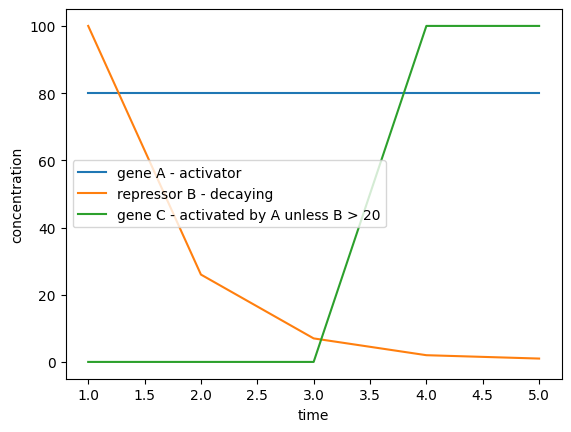

In [10]:
# now let's plot the concentrations
plt.plot(conc_df.timepoint, conc_df.A, label='gene A - activator')
plt.plot(conc_df.timepoint, conc_df.B, label='repressor B - decaying')
plt.plot(conc_df.timepoint, conc_df.C, label='gene C - activated by A unless B > 20')
plt.xlabel('time')
plt.ylabel('concentration')
plt.legend(loc='center left')